# Proposed supervised learning settings :
- Input space : Temperature in degrees Celsius (°C)
- Output space : Ice cream sales in dollars ($)
- Distribution :
    - X ~ Uniform[0, 40]
    - Y|X=x ~ N(10x, 100)
- Loss function: $$
\ell(\hat{y}, y) = (\hat{y} - y)^2
$$

- Bayes predictor :
    - Risk is:

$$
R^* = \mathbb{E}[(f^*(X) - Y)^2] = \mathbb{E}[(10X - Y)^2]
$$

Because $Y = 10X + \varepsilon$ where $\varepsilon \sim \mathcal{N}(0, 100)$:

$$
R^* = \mathbb{E}[(10X - 10X - \varepsilon)^2] = \mathbb{E}[\varepsilon^2] = \mathrm{Var}(\varepsilon) = 100\ \text{dollars}^2
$$

### **Conclusion:**

- Bayes predictor: \( f^*(x) = 10x \) (sales increase by $10 per degree Celsius)
- Bayes risk: \( 100\ \text{dollars}^2 \) (because of random fluctuations during the sales)



Small set:
Resultats 20 train samples / 10000 test samples:
Empirical risk of Linear Regression: 111.23
Empirical risk of Bayes predictor: 100.02
Theoretical Bayes risk: 100.00

Difference (f̂ - f*): 11.21
f* empirical risk vs Bayes risk: 0.02


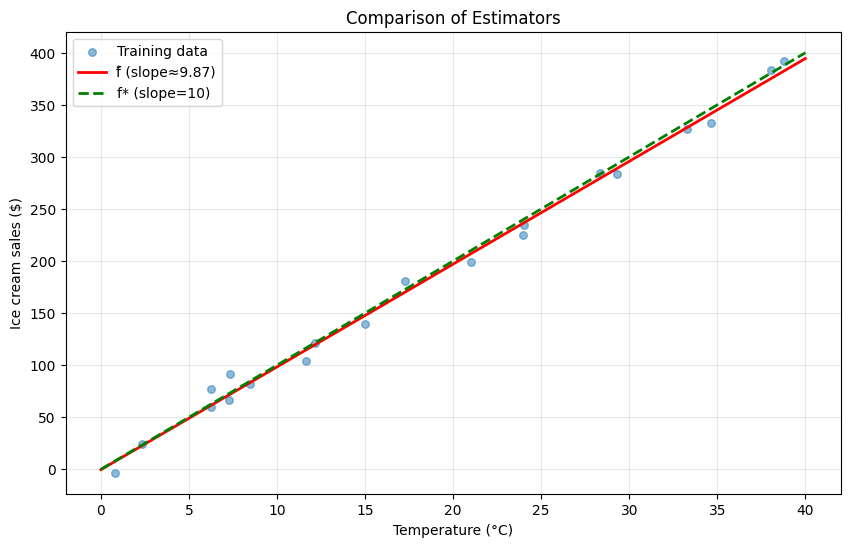


Medium set:
Resultats 100 train samples / 10000 test samples:
Empirical risk of Linear Regression: 104.04
Empirical risk of Bayes predictor: 102.63
Theoretical Bayes risk: 100.00

Difference (f̂ - f*): 1.41
f* empirical risk vs Bayes risk: 2.63


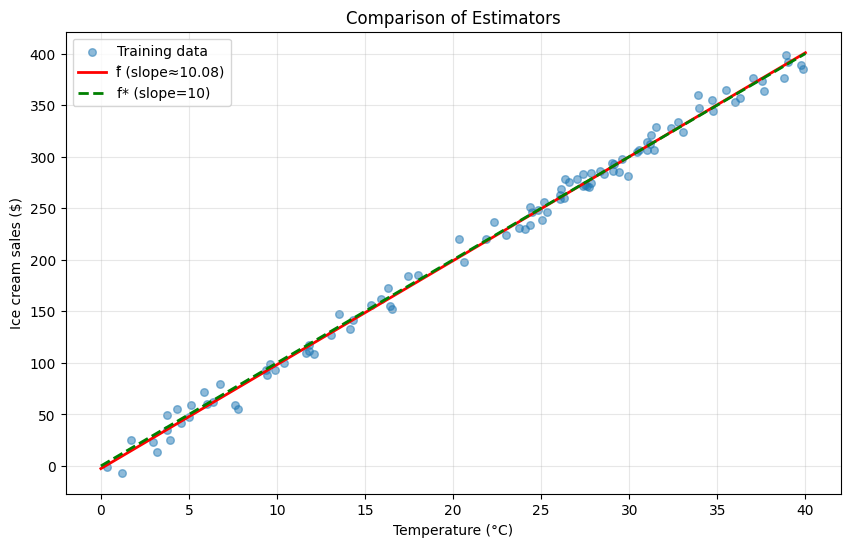


Large set:
Resultats 1000 train samples / 10000 test samples:
Empirical risk of Linear Regression: 102.14
Empirical risk of Bayes predictor: 101.75
Theoretical Bayes risk: 100.00

Difference (f̂ - f*): 0.39
f* empirical risk vs Bayes risk: 1.75


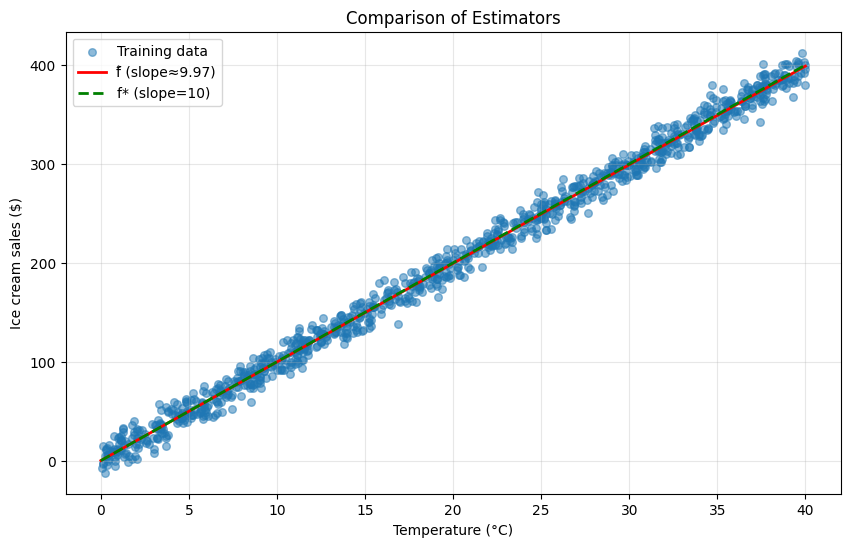

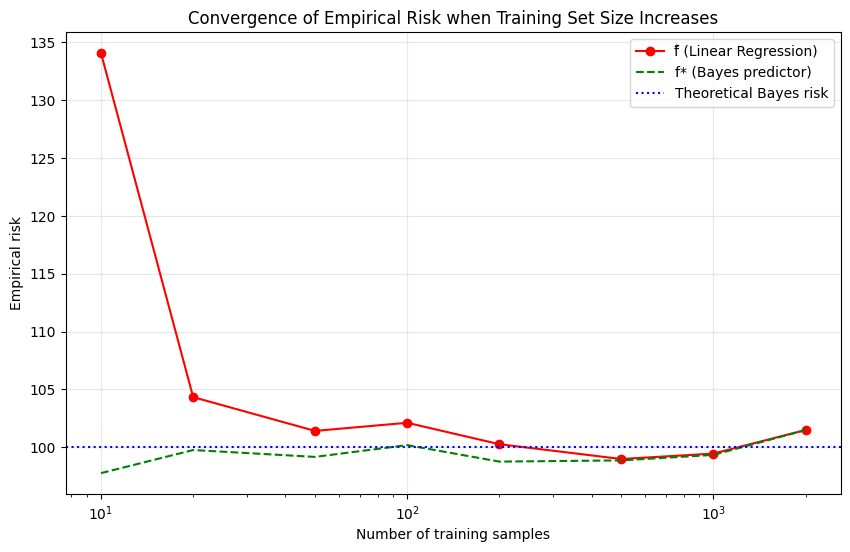

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)

def generate_data(n_samples):

    X = np.random.uniform(0, 40, n_samples)
    noise = np.random.normal(0, np.sqrt(100), n_samples)
    Y = 10 * X + noise
    return X.reshape(-1, 1), Y

def bayes_predictor(X):
    return 10 * X.flatten()

class LinearEstimator:
    def __init__(self):
        self.model = LinearRegression()
    
    def fit(self, X, Y):
        self.model.fit(X, Y)
    
    def predict(self, X):
        return self.model.predict(X)

def compute_empirical_risk(predictions, true_values):
    return np.mean((predictions - true_values) ** 2)

def run_simulation(n_train=100, n_test=10000):
    X_train, Y_train = generate_data(n_train)
    X_test, Y_test = generate_data(n_test)
    
    f_hat = LinearEstimator()
    f_hat.fit(X_train, Y_train)
    
    predictions_f_hat = f_hat.predict(X_test)
    predictions_f_star = bayes_predictor(X_test)
    
    risk_f_hat = compute_empirical_risk(predictions_f_hat, Y_test)
    risk_f_star = compute_empirical_risk(predictions_f_star, Y_test)
    
    bayes_risk = 100
    
    print(f"Resultats {n_train} train samples / {n_test} test samples:")
    print(f"Empirical risk of Linear Regression: {risk_f_hat:.2f}")
    print(f"Empirical risk of Bayes predictor: {risk_f_star:.2f}")
    print(f"Theoretical Bayes risk: {bayes_risk:.2f}")
    print(f"\nDifference (f̂ - f*): {risk_f_hat - risk_f_star:.2f}")
    print(f"f* empirical risk vs Bayes risk: {abs(risk_f_star - bayes_risk):.2f}")
    
    X_plot = np.linspace(0, 40, 100).reshape(-1, 1)
    plt.figure(figsize=(10, 6))
    
    plt.scatter(X_train, Y_train, alpha=0.5, label='Training data', s=30)
    
    plt.plot(X_plot, f_hat.predict(X_plot), 'r-', linewidth=2, 
             label=f'f̂ (slope≈{f_hat.model.coef_[0]:.2f})')
    plt.plot(X_plot, bayes_predictor(X_plot), 'g--', linewidth=2, 
             label='f* (slope=10)')
    
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Ice cream sales ($)')
    plt.title('Comparison of Estimators')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return risk_f_hat, risk_f_star, f_hat


print("\nSmall set:")
run_simulation(n_train=20, n_test=10000)

print("\nMedium set:")
run_simulation(n_train=100, n_test=10000)

print("\nLarge set:")
risk_f_hat, risk_f_star, f_hat = run_simulation(n_train=1000, n_test=10000)


training_sizes = [10, 20, 50, 100, 200, 500, 1000, 2000]
risks_f_hat = []
risks_f_star = []

for n in training_sizes:
    X_train, Y_train = generate_data(n)
    X_test, Y_test = generate_data(10000)
    
    f_hat = LinearEstimator()
    f_hat.fit(X_train, Y_train)
    
    risks_f_hat.append(compute_empirical_risk(f_hat.predict(X_test), Y_test))
    risks_f_star.append(compute_empirical_risk(bayes_predictor(X_test), Y_test))

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, risks_f_hat, 'r-o', label='f̂ (Linear Regression)')
plt.plot(training_sizes, risks_f_star, 'g--', label='f* (Bayes predictor)')
plt.axhline(y=100, color='b', linestyle=':', label='Theoretical Bayes risk')
plt.xlabel('Number of training samples')
plt.ylabel('Empirical risk')
plt.title('Convergence of Empirical Risk when Training Set Size Increases')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xscale('log')
plt.show()